In [1]:
#Modeling - Initial time based modeling
#Goal of this notebook is to read in a training file, select out a sport from the activities,
#Plot it and predict on what the performance at a later date will be.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

In [3]:
#Let's read in a single csv first:
race_df = pd.read_csv('./data/races/athlete_3/athlete_3_race_4_3_mo_Running_extra_cols.csv', index_col='date')

In [4]:
race_df.head()

,Unnamed: 0,index,activity_type,favorite,title,distance,calories,time,avg_hr,max_hr,...,max_resp,athlete_id,filetype,is_race,ft_per_mile,intensity,spd_ft_s,spd_mph,GAP_ft_s,GAP_by_intensity
date,,,,,,,,,,,,,,,,,,,,,
2019-04-25,0,0,Running,False,Fresno Running,4.40,496,00:35:02,138,155,...,0,3,garmin,0,8.181818,0.745946,11.069182,7.547170,11.069196,14.839139
2019-04-27,1,4,Running,False,Boulder Running,2.59,320,00:20:02,147,165,...,0,3,garmin,0,41.698842,0.794595,11.379310,7.758621,11.379665,14.321347
2019-04-28,2,5,Running,False,Denver Running,12.64,"1,453",01:38:16,149,171,...,0,3,garmin,0,45.965190,0.805405,11.306210,7.708779,11.306638,14.038443
2019-04-30,3,11,Running,False,Denver Running,6.53,736,00:50:03,142,154,...,0,3,garmin,0,18.070444,0.767568,11.478261,7.826087,11.478328,14.954160
2019-05-02,4,15,Running,False,Denver Running,6.17,644,00:50:18,136,159,...,0,3,garmin,0,47.811994,0.735135,10.797546,7.361963,10.797989,14.688441


In [5]:
race_df[race_df['is_race'] == 1]

,Unnamed: 0,index,activity_type,favorite,title,distance,calories,time,avg_hr,max_hr,...,max_resp,athlete_id,filetype,is_race,ft_per_mile,intensity,spd_ft_s,spd_mph,GAP_ft_s,GAP_by_intensity
date,,,,,,,,,,,,,,,,,,,,,


In [6]:
#Great, I have a 3 month train set. Race is a half marathon at 1:27:20 time.

In [7]:
race_df['elev_gain'] = race_df['elev_gain'].str.replace(',', '').astype(float)


AttributeError: Can only use .str accessor with string values!

In [8]:
race_df['elev_loss'] = race_df['elev_loss'].str.replace(',', '').astype(float)


In [9]:
race_df['calories'] = race_df['calories'].str.replace(',', '').astype(float)

In [10]:
race_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 2019-04-25 to 2019-07-25
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                51 non-null     int64  
 1   index                     51 non-null     int64  
 2   activity_type             51 non-null     object 
 3   favorite                  51 non-null     bool   
 4   title                     51 non-null     object 
 5   distance                  51 non-null     float64
 6   calories                  51 non-null     float64
 7   time                      51 non-null     object 
 8   avg_hr                    51 non-null     int64  
 9   max_hr                    51 non-null     int64  
 10  aerobic_te                51 non-null     float64
 11  avg_run_cadence           51 non-null     int64  
 12  max_run_cadence           51 non-null     int64  
 13  avg_pace                  51 non-null     object 
 14  

In [11]:
import pmdarima as pmd

In [12]:
from pmdarima.utils import tsdisplay

/Users/Keith/miniconda3/envs/timer/lib/python3.8/site-packages/pmdarima/utils/visualization.py:219: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


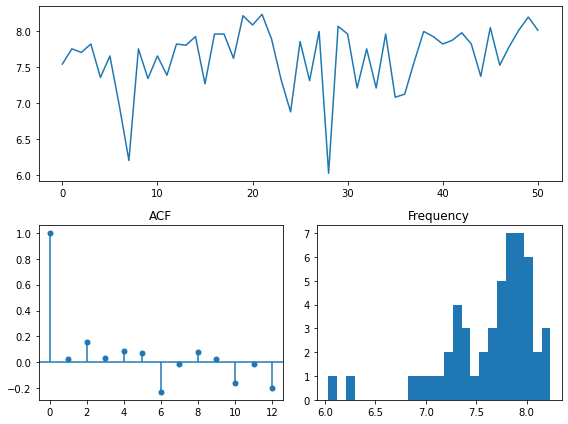

In [13]:
tsdisplay(race_df['spd_mph'], lag_max=12)

/Users/Keith/miniconda3/envs/timer/lib/python3.8/site-packages/pmdarima/utils/visualization.py:219: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


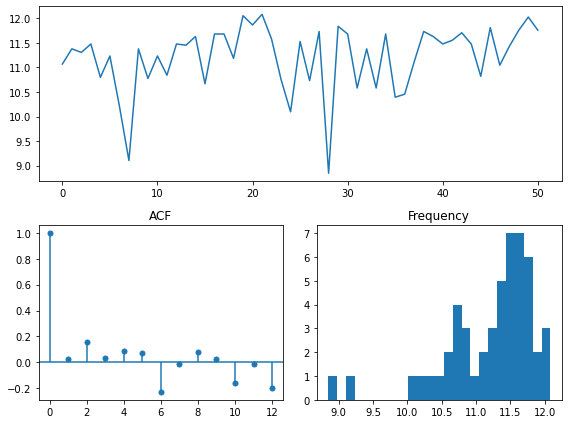

In [14]:
tsdisplay(race_df['GAP_ft_s'], lag_max=12)

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX as sm

In [16]:
X = race_df[['distance', 'avg_hr','elev_gain']] #, 'avg_stride_length', 'avg_ground_contact_time']]

In [17]:
len(X)

51

In [18]:
y = race_df['spd_ft_s']

In [19]:
model = pmd.auto_arima(y, X=X, m=14, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[14] intercept   : AIC=85.385, Time=2.04 sec
 ARIMA(0,0,0)(0,0,0)[14] intercept   : AIC=71.813, Time=0.26 sec
 ARIMA(1,0,0)(1,0,0)[14] intercept   : AIC=79.493, Time=0.75 sec
 ARIMA(0,0,1)(0,0,1)[14] intercept   : AIC=79.694, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[14]             : AIC=76.052, Time=0.20 sec
 ARIMA(0,0,0)(1,0,0)[14] intercept   : AIC=79.124, Time=0.48 sec
 ARIMA(0,0,0)(0,0,1)[14] intercept   : AIC=78.989, Time=0.61 sec
 ARIMA(0,0,0)(1,0,1)[14] intercept   : AIC=79.110, Time=1.01 sec
 ARIMA(1,0,0)(0,0,0)[14] intercept   : AIC=73.642, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[14] intercept   : AIC=78.769, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[14] intercept   : AIC=79.305, Time=0.23 sec

Best model:  ARIMA(0,0,0)(0,0,0)[14] intercept
Total fit time: 7.077 seconds


In [20]:
preds = model.predict(1, [[12.96, 166, 154]])#, 1.30, 240]])
preds

/Users/Keith/miniconda3/envs/timer/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


array([12.83002575])

In [196]:
#This is actually very close to my actual race pace of 6:45 miles, which is 13.03 ft/s.

In [ ]:
#San Fran Marathon July 2018

In [30]:
#Let's read in a single csv first:
race_df2 = pd.read_csv('./data/races/athlete_0/athlete_0_race_0_3_mo_Running_extra_cols.csv', index_col='date')

try:
    race_df2['elev_gain'] = race_df2['elev_gain'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_gain'][0]))


try:
    race_df2['elev_loss'] = race_df2['elev_loss'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_loss'][0]))


try:
    race_df2['calories'] = race_df2['calories'].str.replace(',', '').astype(float)
except:
    print(race_df2['calories'].info())

In [46]:
tsdisplay(race_df2['spd_mph'], lag_max=12)

tsdisplay(race_df2['GAP_ft_s'], lag_max=12)

X = race_df2[race_df2['is_race']==0][['distance', 'avg_hr','elev_gain']] #, 'avg_stride_length', 'avg_ground_contact_time']]

y = race_df2[race_df2['is_race']==0]['spd_ft_s']

In [44]:
model = pmd.auto_arima(y, X=X, m=7, trace=True)

preds = model.predict(1, X = race_df2[race_df2['is_race']==1][['distance', 'avg_hr','elev_gain']])#, 1.30, 240]])
preds

In [ ]:
#Does not work so well for a 50 mile race with not as much similar data.

### Athlete 1

In [47]:
#Let's read in a single csv first:
race_df2 = pd.read_csv('./data/races/athlete_1/athlete_1_race_0_3_mo_Running_extra_cols.csv', index_col='date')

try:
    race_df2['elev_gain'] = race_df2['elev_gain'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_gain'][0]))


try:
    race_df2['elev_loss'] = race_df2['elev_loss'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_loss'][0]))


try:
    race_df2['calories'] = race_df2['calories'].str.replace(',', '').astype(float)
except:
    print(race_df2['calories'].info())

<class 'numpy.int64'>
<class 'numpy.int64'>


/Users/Keith/miniconda3/envs/timer/lib/python3.8/site-packages/pmdarima/utils/visualization.py:219: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


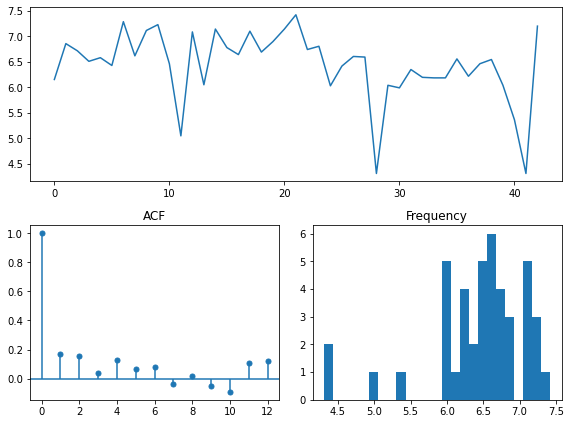

/Users/Keith/miniconda3/envs/timer/lib/python3.8/site-packages/pmdarima/utils/visualization.py:219: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


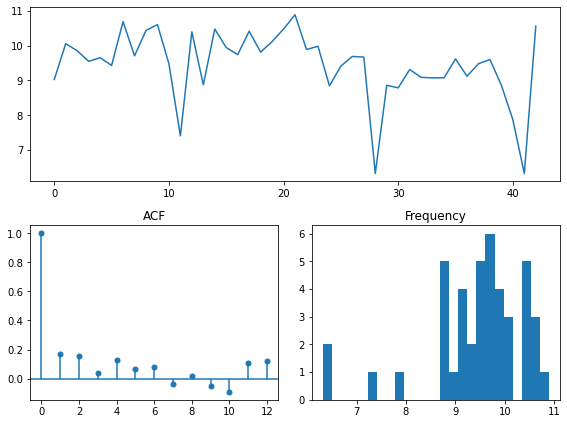

In [48]:
tsdisplay(race_df2['spd_mph'], lag_max=12)

tsdisplay(race_df2['GAP_ft_s'], lag_max=12)

X = race_df2[race_df2['is_race']==0][['distance', 'avg_hr','elev_gain']] #, 'avg_stride_length', 'avg_ground_contact_time']]

y = race_df2[race_df2['is_race']==0]['spd_ft_s']

In [49]:
model = pmd.auto_arima(y, X=X, m=7, trace=True)

preds = model.predict(1, X = race_df2[race_df2['is_race']==1][['distance', 'avg_hr','elev_gain']])#, 1.30, 240]])
preds

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=80.384, Time=0.97 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=74.122, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=77.717, Time=0.38 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=77.780, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=72.126, Time=0.16 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=75.676, Time=0.24 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=75.622, Time=0.58 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=77.401, Time=0.72 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=76.018, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=76.045, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=78.079, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[7]          
Total fit time: 3.934 seconds


/Users/Keith/miniconda3/envs/timer/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


array([12.23321649])

In [50]:
race_df2[race_df2['is_race']==1][['distance', 'avg_hr','elev_gain', 'spd_ft_s']]

,distance,avg_hr,elev_gain,spd_ft_s
date,,,,
2017-01-15,26.48,147,210,10.56


### Race 1

In [51]:
#Let's read in a single csv first:
race_df2 = pd.read_csv('./data/races/athlete_1/athlete_1_race_1_3_mo_Running_extra_cols.csv', index_col='date')

try:
    race_df2['elev_gain'] = race_df2['elev_gain'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_gain'][0]))


try:
    race_df2['elev_loss'] = race_df2['elev_loss'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_loss'][0]))


try:
    race_df2['calories'] = race_df2['calories'].str.replace(',', '').astype(float)
except:
    print(race_df2['calories'].info())

<class 'numpy.int64'>


/Users/Keith/miniconda3/envs/timer/lib/python3.8/site-packages/pmdarima/utils/visualization.py:219: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


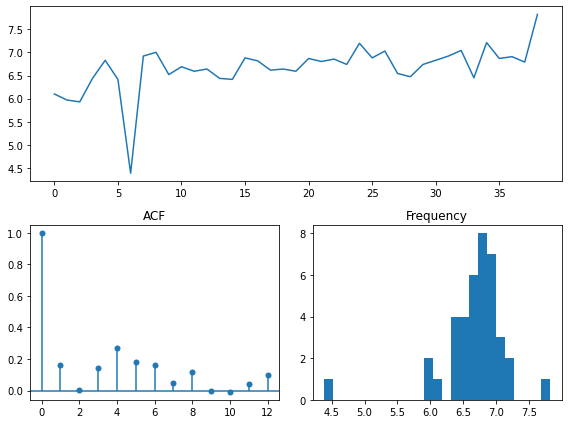

/Users/Keith/miniconda3/envs/timer/lib/python3.8/site-packages/pmdarima/utils/visualization.py:219: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


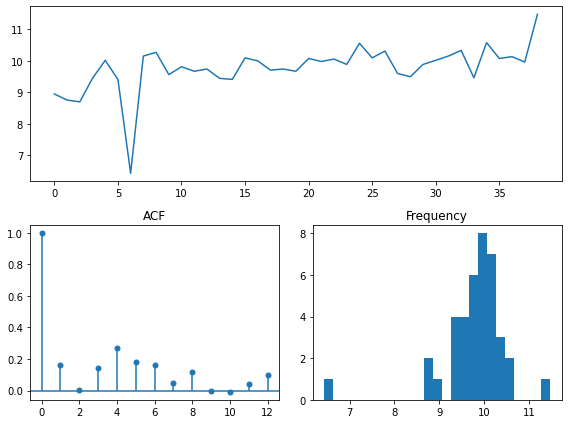

In [63]:
tsdisplay(race_df2['spd_mph'], lag_max=12)

tsdisplay(race_df2['GAP_ft_s'], lag_max=12)

X = race_df2[race_df2['is_race']==0][['distance', 'avg_hr','elev_gain', 'elev_loss']] #, 'avg_stride_length', 'avg_ground_contact_time']]

y = race_df2[race_df2['is_race']==0]['spd_ft_s']

In [64]:
model = pmd.auto_arima(y, X=X, m=1, trace=True)

preds = model.predict(1, X = race_df2[race_df2['is_race']==1][['distance', 'avg_hr','elev_gain', 'elev_loss']])#, 1.30, 240]])
preds

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=102.859, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=69.484, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=92.626, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=73.823, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=151.515, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=73.707, Time=0.23 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.273 seconds


/Users/Keith/miniconda3/envs/timer/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


array([11.41804417])

### Athlete 1 Race 2

In [ ]:
#Clearly this did not work as planned.

In [55]:
#Let's read in a single csv first:
race_df2 = pd.read_csv('./data/races/athlete_1/athlete_1_race_2_3_mo_Running_extra_cols.csv', index_col='date')

try:
    race_df2['elev_gain'] = race_df2['elev_gain'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_gain'][0]))


try:
    race_df2['elev_loss'] = race_df2['elev_loss'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_loss'][0]))


try:
    race_df2['calories'] = race_df2['calories'].str.replace(',', '').astype(float)
except:
    print(race_df2['calories'].info())

<class 'numpy.int64'>
<class 'numpy.int64'>


/Users/Keith/miniconda3/envs/timer/lib/python3.8/site-packages/pmdarima/utils/visualization.py:219: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


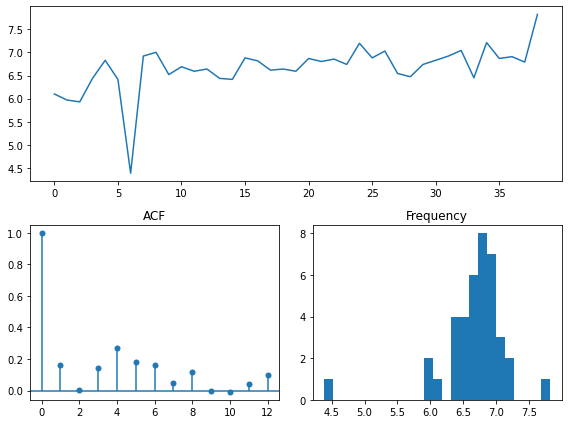

/Users/Keith/miniconda3/envs/timer/lib/python3.8/site-packages/pmdarima/utils/visualization.py:219: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


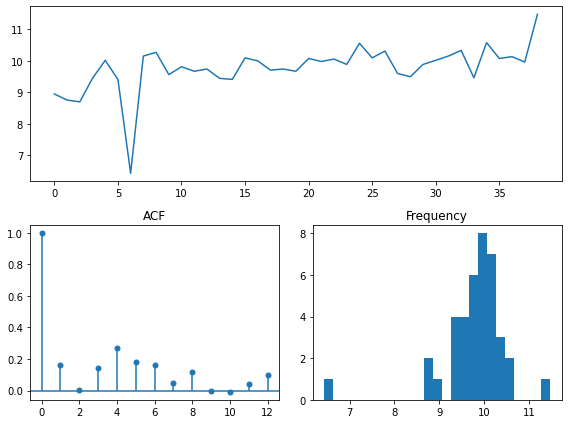

In [67]:
tsdisplay(race_df2['spd_mph'], lag_max=12)

tsdisplay(race_df2['GAP_ft_s'], lag_max=12)

X = race_df2[race_df2['is_race']==0][['distance', 'calories','elev_gain', 'elev_loss', 'avg_run_cadence']] #, 'avg_stride_length', 'avg_ground_contact_time']]

y = race_df2[race_df2['is_race']==0]['spd_ft_s']

In [71]:
race_df2[race_df2['is_race']==1]['avg_run_cadence']

date
2019-06-02    172
Name: avg_run_cadence, dtype: int64

In [ ]:
#Interesting, on race day the athlete ups their cadence compared to the average.

In [68]:
model = pmd.auto_arima(y, X=X, m=1, trace=True)

preds = model.predict(1, X = race_df2[race_df2['is_race']==1][['distance', 'calories','elev_gain', 'elev_loss', 'avg_run_cadence']])#, 1.30, 240]])
preds

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=33.614, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=19.454, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=21.448, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=21.616, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=17.758, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=23.513, Time=0.24 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 1.170 seconds


/Users/Keith/miniconda3/envs/timer/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


array([11.47014765])

The actual race data below:

In [80]:
race_df2[race_df2['is_race']==1][['spd_ft_s', 'distance', 'calories', 'elev_gain', 'elev_loss', 'avg_hr']]

,spd_ft_s,distance,calories,elev_gain,elev_loss,avg_hr
date,,,,,,
2019-06-02,11.478261,13.14,1766.0,354,604,0


In [ ]:
#I think this is too much bleed-in. The race cadence can be estimated, but we shouldn't use the
#actual race cadence to predict with.

In [79]:
#Looking at the cadence in training:
race_df2[(race_df2['is_race']==0) & (race_df2['distance']>10)]['avg_run_cadence'].mean()

167.0

In [85]:
#Looking at the average calories/mile on long runs:
(race_df2[(race_df2['is_race']==0) & (race_df2['distance']>10)]['calories']/race_df2[(race_df2['is_race']==0) & (race_df2['distance']>10)]['distance']).mean()

125.9140081664164

In [ ]:
#so for a 13.1, we would expect: 1638 calories

In [86]:
model.predict(1, X = [[13.14, 1638, 354, 604, 167]])

/Users/Keith/miniconda3/envs/timer/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


array([11.18232055])

In [83]:
#So what I am learning is, if we have a predicted heart rate or target heart rate, and a cadence,
#which we can pull from the training that is near the target race distance ( 10 miles for half,
#20 miles for marathon probably) we can get within about :15s/mile

## Athlete 2

### Race 5

In [94]:
#Let's read in a single csv first:
race_df2 = pd.read_csv('./data/races/athlete_2/athlete_2_race_5_3_mo_Running_extra_cols.csv', index_col='date')

try:
    race_df2['elev_gain'] = race_df2['elev_gain'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_gain'][0]))


try:
    race_df2['elev_loss'] = race_df2['elev_loss'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_loss'][0]))


try:
    race_df2['calories'] = race_df2['calories'].str.replace(',', '').astype(float)
except:
    print(race_df2['calories'].info())

<class 'numpy.int64'>
<class 'numpy.int64'>


/Users/Keith/miniconda3/envs/timer/lib/python3.8/site-packages/pmdarima/utils/visualization.py:219: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


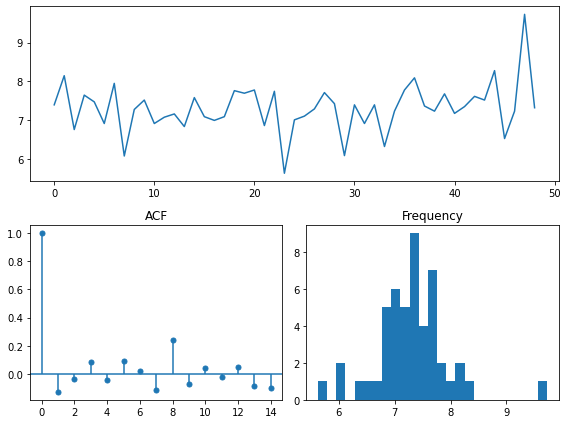

/Users/Keith/miniconda3/envs/timer/lib/python3.8/site-packages/pmdarima/utils/visualization.py:219: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


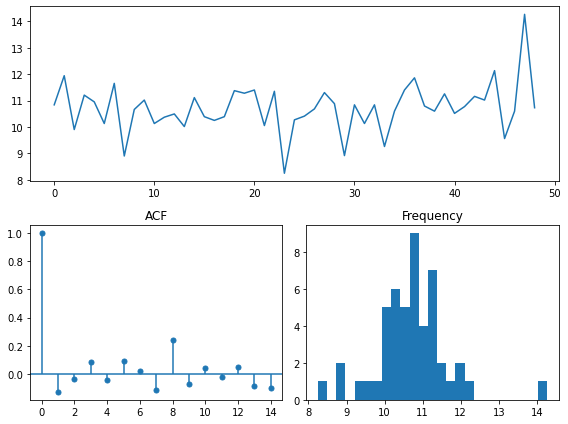

In [95]:
tsdisplay(race_df2['spd_mph'], lag_max=14)

tsdisplay(race_df2['GAP_ft_s'], lag_max=14)

X = race_df2[race_df2['race']==0][['distance', 'avg_hr','elev_gain', 'elev_loss']] #, 'avg_stride_length', 'avg_ground_contact_time']]

y = race_df2[race_df2['race']==0]['spd_ft_s']

In [96]:
model = pmd.auto_arima(y, X=X, m=7, trace=True)

preds = model.predict(1, X = race_df2[race_df2['race']==1][['distance', 'avg_hr','elev_gain', 'elev_loss']])#, 1.30, 240]])
preds

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=122.564, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=106.353, Time=0.20 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=116.207, Time=0.72 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=115.518, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=112.753, Time=0.20 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=112.341, Time=0.46 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=113.126, Time=0.45 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=117.673, Time=0.48 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=115.657, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=115.746, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=111.853, Time=0.24 sec

Best model:  ARIMA(0,0,0)(0,0,0)[7] intercept
Total fit time: 4.479 seconds


/Users/Keith/miniconda3/envs/timer/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


array([12.15430104])

In [97]:
race_df2[race_df2['race']==1][['spd_ft_s', 'distance', 'avg_hr','elev_gain', 'elev_loss']]

,spd_ft_s,distance,avg_hr,elev_gain,elev_loss
date,,,,,
2018-11-24,14.27027,3.09,176,49,49


In [ ]:
#This athlete is a lot faster than their training lets on.

## Athlete 10

### Race 0

In [98]:
#Let's read in a single csv first:
race_df2 = pd.read_csv('./data/races/athlete_10/athlete_10_race_0_3_mo_Running_extra_cols.csv', index_col='date')

try:
    race_df2['elev_gain'] = race_df2['elev_gain'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_gain'][0]))


try:
    race_df2['elev_loss'] = race_df2['elev_loss'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_loss'][0]))


try:
    race_df2['calories'] = race_df2['calories'].str.replace(',', '').astype(float)
except:
    print(race_df2['calories'].info())

<class 'numpy.int64'>
<class 'numpy.int64'>


/Users/Keith/miniconda3/envs/timer/lib/python3.8/site-packages/pmdarima/utils/visualization.py:219: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


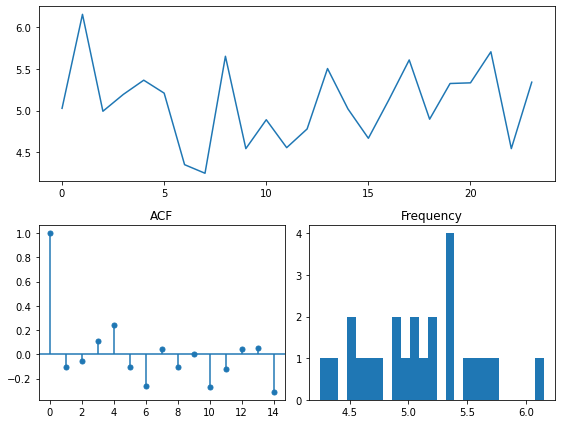

/Users/Keith/miniconda3/envs/timer/lib/python3.8/site-packages/pmdarima/utils/visualization.py:219: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


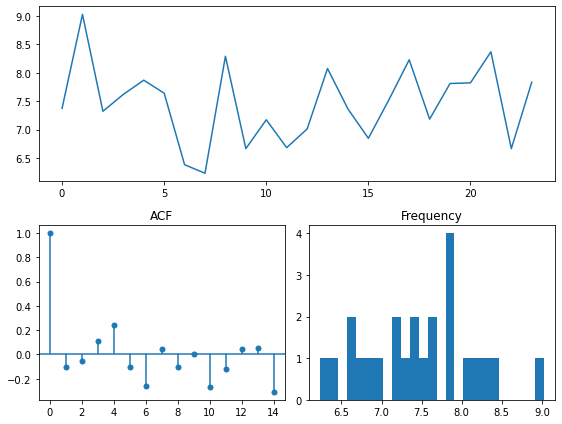

In [104]:
tsdisplay(race_df2['spd_mph'], lag_max=14)

tsdisplay(race_df2['GAP_ft_s'], lag_max=14)

X = race_df2[race_df2['is_race']==0][['distance', 'avg_hr','elev_gain', 'elev_loss', 'avg_run_cadence']] #, 'avg_stride_length', 'avg_ground_contact_time']]

y = race_df2[race_df2['is_race']==0]['spd_ft_s']

In [107]:
#Lets find the average cadence for long runs:
race_df2[race_df2['is_race']==0]['avg_run_cadence'].mean()

155.43478260869566

In [108]:
#And heart rate:
race_df2[race_df2['is_race']==0]['avg_hr'].mean()

150.8695652173913

In [106]:
race_df2[race_df2['is_race']==1][['distance', 'avg_hr','elev_gain', 'elev_loss', 'avg_run_cadence']]

,distance,avg_hr,elev_gain,elev_loss,avg_run_cadence
date,,,,,
2018-10-27,13.09,171,594,896,159


In [105]:
model = pmd.auto_arima(y, X=X, m=7, trace=True)

preds = model.predict(1, X = race_df2[race_df2['is_race']==1][['distance', 'avg_hr','elev_gain', 'elev_loss', 'avg_run_cadence']])#, 1.30, 240]])
preds

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=27.328, Time=0.87 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=31.058, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=20.618, Time=0.48 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=19.627, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=29.064, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=17.670, Time=0.31 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=18.228, Time=0.55 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=21.562, Time=0.81 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=20.008, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=18.389, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=19.572, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=22.025, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[7]             : AIC=16.010, Time=0.15 sec
 ARIMA(0,0,1)(1,0,0)[7]             : AIC=16.528, Time=0.70 sec
 ARIMA(0,0,1)(0,0,1)[7]             : AIC=17.943, Time=1.07 s

/Users/Keith/miniconda3/envs/timer/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


array([7.99719228])

In [102]:
race_df2[race_df2['is_race']==1][['spd_ft_s','distance', 'avg_hr','elev_gain', 'elev_loss']]

,spd_ft_s,distance,avg_hr,elev_gain,elev_loss
date,,,,,
2018-10-27,7.833828,13.09,171,594,896


In [110]:
preds2 = model.predict(1, X = [[13.1, 150, 594, 896, 159]])

/Users/Keith/miniconda3/envs/timer/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [111]:
preds2

array([7.649452])